In [162]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

#### Plotting parameters

In [163]:
params = {'legend.fontsize': 20,
          'figure.figsize': (11.5, 10.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 3,
          'lines.markersize': 7,
          'font.family': 'sans-serif',
          'figure.autolayout': True}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [164]:
n_runs = 5 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

# Relativistic parameters of the study, used for the post process analysis
neps_y = 2e-6 # m
gamma_0 = 287.8 
beta_0  = np.sqrt(1-1/gamma_0**2)

In [228]:
# Noise parameters
type_of_noise = 'PN'
rms_ksi_list =  [0.04, 0.06, 0.08, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]
rms_ksi_list =  [0.04, 0.06, 0.08, 0.2, 0.4, 0.6, 0.8]
peak= 0.18
# tune spread
delta_rms = 2.1e-4
ayy_min = -3e5 # -1e6 
ayy_max =  3e5  # 1e6
N_size = 10
ayy_list = list(np.linspace(ayy_min, ayy_max, N_size))

In [229]:
reader = csv.reader(open('./PSD_constant/m_values.csv', 'r'))
d = {}
k =0
for row in reader:
    v = row
    d[k] = v
    k = k+1
    
m_dict = {}

for index, rms_ksi in enumerate(rms_ksi_list):
    temp = d[1][index]
    m_dict['rmsKsi{}'.format(rms_ksi)] = temp[1:-1]
kk = {}   
for rms_ksi in rms_ksi_list:
    k2 = m_dict['rmsKsi{}'.format(rms_ksi)].split(',')
    kk['rmsKsi{}'.format(rms_ksi)] = [float(i) for i in k2]

In [216]:
reader_2 = csv.reader(open('err_values.csv', 'r'))
d_err = {}
k =0
for row in reader_2:
    v = row
    d_err[k] = v
    k = k+1
    
err_dict = {}

for index, rms_ksi in enumerate(rms_ksi_list):
    temp = d_err[1][index]
    err_dict['rmsKsi{}'.format(rms_ksi)] = temp[1:-1]
kk_err = {}   
for rms_ksi in rms_ksi_list:
    k2 = m_dict['rmsKsi{}'.format(rms_ksi)].split(',')
    kk_err['rmsKsi{}'.format(rms_ksi)] = [float(i) for i in k2]

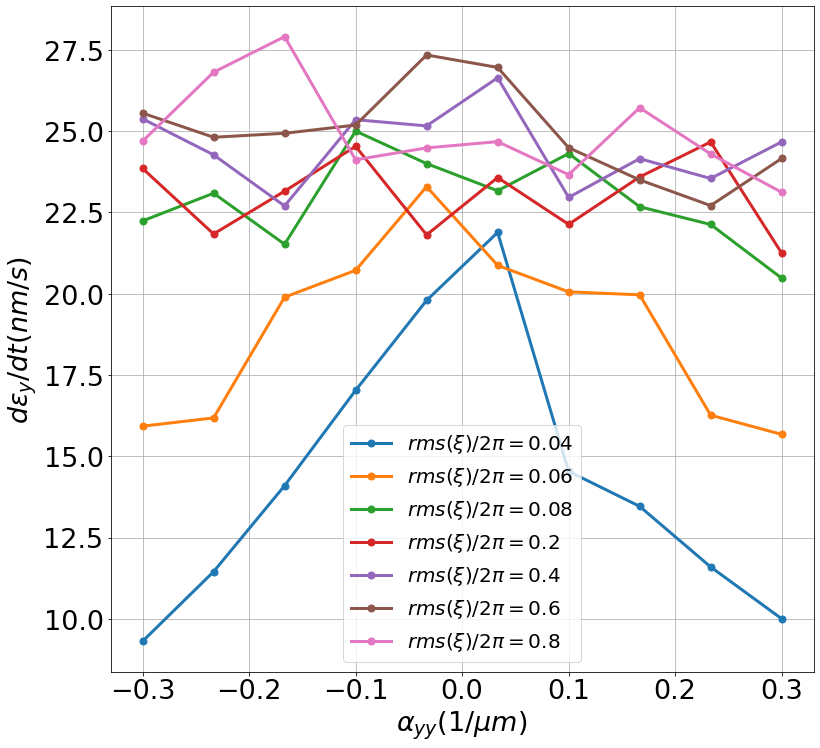

In [230]:
fig, ax = plt.subplots()
for rms_ksi in rms_ksi_list:
    ax.plot(np.array(ayy_list)/1e6, np.array(kk['rmsKsi{}'.format(rms_ksi)])*1e9, marker ='o', label=r'$rms(\xi)  / 2 \pi = {} $'.format(rms_ksi))

    #ax.errorbar(np.array(ayy_list)/1e6, np.array(kk['rmsKsi{}'.format(rms_ksi)])*1e9,yerr= np.array(kk_err['rmsKsi{}'.format(rms_ksi)])*1e9, marker ='o', label=r'$rms(\xi)  / 2 \pi = {} $'.format(rms_ksi))
ax.set_xlabel(r'$\alpha_{yy} (1/\mu m)$')
ax.set_ylabel(r'$d\epsilon_y /dt (nm/s)$')
#ax.ticklabel_format(axis='x', style='scientific', scilimits=(0,0))
plt.grid()
plt.legend(loc=0)
plt.tight_layout()
save_fig = True
if save_fig:
    plt.savefig('emit_growth_vs_DQy_vs_rmsKsiScan_LongBunch_v2.png'.format(rms_ksi))

#### **8) Compute the rms tune spread**
**Detuning** due to octupole non-linearity for particles with given betatron amplitudes $A_x, A_y$ is given by:

\begin{equation}
\Delta \nu_y (J_y, J_x) = \nu_y(J_y, J_x) - \nu_{y_0} = \alpha_{yy} J_y - \alpha_{yx}J_x, (1)
\end{equation}
where th transverse actions $J_y$ and $J_x$ are given by:

\begin{equation}
J_{x,y} = \frac{A^2_{x,y}}{2\beta_{x,y}(s)}, (2)
\end{equation}
where $\beta_{x,y}(s)$ the beta function at the locations $s$ of the lattice.


**In our studies:** $\alpha_{yx}=0$ and therefore the equation (1) written as:

\begin{equation}
\Delta \nu_y (J_y) = \alpha_{yy} J_y, (3)
\end{equation}

Therefore, **the RMS tune spread**, from the Landau octupoles, can be computed by:
\begin{equation}
\Delta \nu_y (J_y)_{RMS} = \alpha_{yy}* 2*J_{y_{RMS}}, (4)
\end{equation}

, where the factor 2 is required to give the correct tune spread when Sixtracklib is used.

Note that $J_{y_{RMS}} = e_{y,geom} = e_{y,norm}/ \beta _0 \gamma_0$, where $\beta _0 \gamma_0$ the relativistic parameters of the reference particle

In [226]:
neps_y = 2e-6 # [m]
# Compute the initial RMS Jy. We assume that the initial normalised emittance for each study is 2μm. In reality when the distribuiton is created we don't get exaclty 2μm
Jy_rms = ey_geom = neps_y/(beta_0*gamma_0)# [m] 
DQy_rms = np.array(ayy_list)*2*Jy_rms

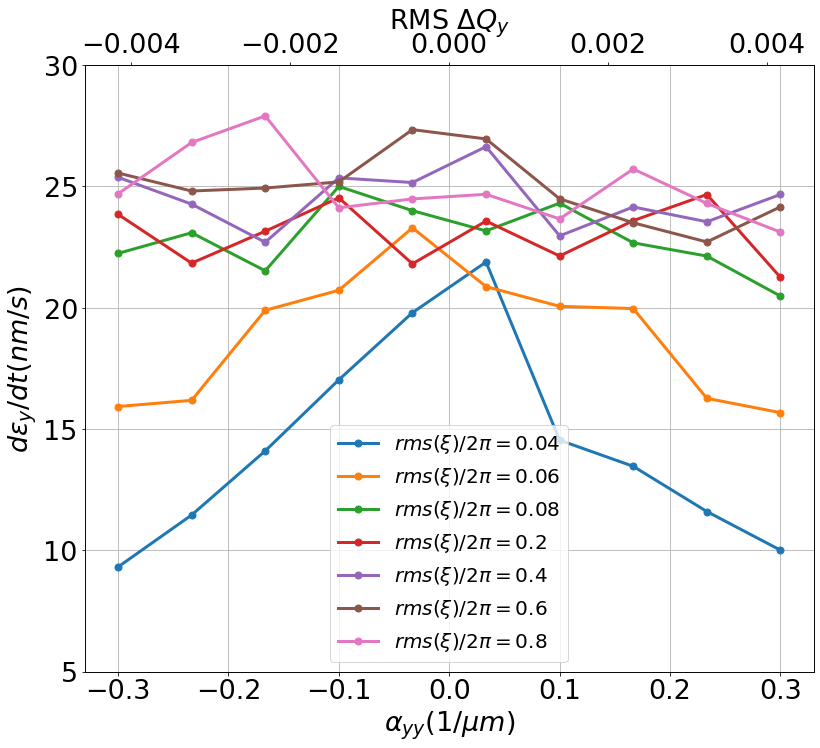

In [232]:
fig, ax1 = plt.subplots()
#rms_ksi_list = [0.2, 0.6]
for rms_ksi in rms_ksi_list:
    ax1.plot(np.array(ayy_list)/1e6, np.array(kk['rmsKsi{}'.format(rms_ksi)])*1e9, marker ='o', label=r'$rms(\xi)  / 2 \pi = {} $'.format(rms_ksi))
    #ax1.errorbar(np.array(ayy_list)/1e6, np.array(m_dict['rmsKsi{}'.format(rms_ksi)])*1e9,yerr= np.array(err_dict['rmsKsi{}'.format(rms_ksi)])*1e9, marker ='o', label=r'$rms(\xi)  / 2 \pi = {} $'.format(rms_ksi))
ax1.set_xlabel(r'$\alpha_{yy} (1/\mu m)$')
ax1.set_ylabel(r'$d\epsilon_y /dt (nm/s)$')
ax1.grid()
ax1.legend()

ax2 = ax1.twiny() 
ax2.plot(np.array(DQy_rms), np.zeros(len(ayy_list)), )
ax2.set_xlabel('RMS '+r'$\Delta Q_y $')

plt.ylim(5, 30.0) # long bunch
#plt.ylim(7.5, 175) # short bunch, smaller ξ/2π=0.08
#plt.ylim(5, 320) # short bunch

plt.tight_layout()
savefig = True
if savefig:
     plt.savefig('emt_grwoth_new_constant_PSD.png'.format(rms_ksi))


#### **9) Intensity**

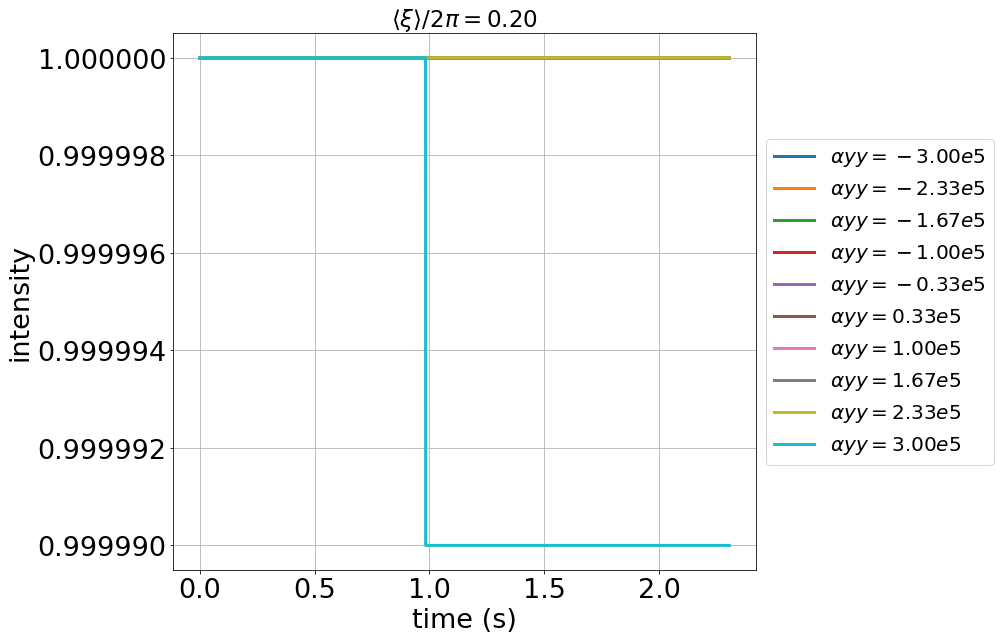

In [318]:
import matplotlib
fig = plt.figure(figsize=(14,9))
ax = plt.subplot(111)
for rms_ksi in rms_ksi_list[0:1]:
    for index, ayy in enumerate(ayy_list):
        for run in range(n_runs):
            temp_name = 'DQ{}_rmsKsi{}_run{}'.format(ayy, rms_ksi, run) # the suffix
        ax.plot(time, intensity[temp_name], label=r'$ \alpha yy = {:.2f}e5$'.format(ayy/1e5))
ax.set_ylabel('intensity')
ax.set_xlabel('time (s)')
#ax.set_yscale('log')
y_formatter = matplotlib.ticker.ScalarFormatter(useOffset=False)
ax.yaxis.set_major_formatter(y_formatter)
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'$\langle \xi \rangle / 2\pi = %.2f$'%(rms_ksi))
plt.tight_layout()
plt.grid()
save_fig = False
if save_fig:
    plt.savefig('intensity_vs_ayy_rmsKsi{}_LongBunch.png'.format(rms_ksi))